In [13]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# You can double-check your Python path like this...
import sys
print(sys.path)

['/usr/local/Cellar/python@3.12/3.12.12/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/usr/local/Cellar/python@3.12/3.12.12/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/usr/local/Cellar/python@3.12/3.12.12/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/menghangliu/Desktop/B1/Practicals/b1-coding-practical-mt24/.venv/lib/python3.12/site-packages', '/Users/menghangliu/Desktop/B1/Practicals/b1-coding-practical-mt24']


In [4]:
import os
print(os.getcwd())
print(os.path.exists('/Users/menghangliu/Desktop/B1/Practicals/b1-coding-practical-mt24/data/mission.csv'))

/Users/menghangliu/Desktop/B1/Practicals/b1-coding-practical-mt24/notebooks
True


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

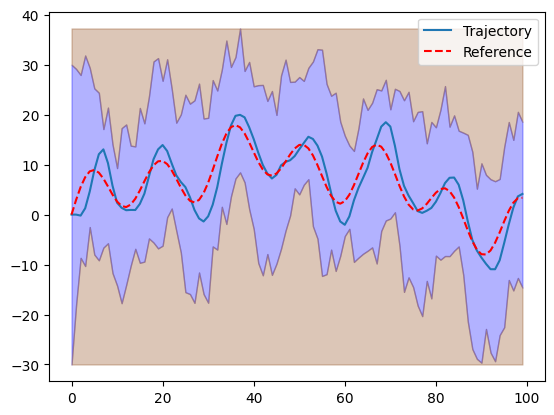

In [22]:
# Import relevant modules
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import pid_controller


sub = Submarine()
# Instantiate your controller (depending on your implementation)
controller = pid_controller(0.15, 0, 0.6)

closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class
# print(mission.reference)      # reference trajectory
# print(mission.cave_height)    # upper boundary
# print(mission.cave_depth)     # lower boundary
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)